Ray-tracing model
==
***

This notebook illustrate how to use the ray-tracing included with DaViTpy

In [1]:
%pylab inline
import datetime as dt
from davitpy.models import raydarn

Populating the interactive namespace from numpy and matplotlib


In [2]:
sTime = dt.datetime(2006, 2, 22, 22)
eTime = dt.datetime(2006, 2, 23, 5)
radar = 'wal'
beam = 3
freq = 10.5

In [3]:
# Run the ray tracing for the specified period, radar, beam and frequency
# Use 4 threads (MPI) and output everything to /tmp
rto = raydarn.RtRun(sTime, eTime, 
    rCode=radar, beam=beam, freq=freq, 
    outDir='/tmp', nprocs=4)

In [4]:
# Read rays into memory
rto.readRays()

/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


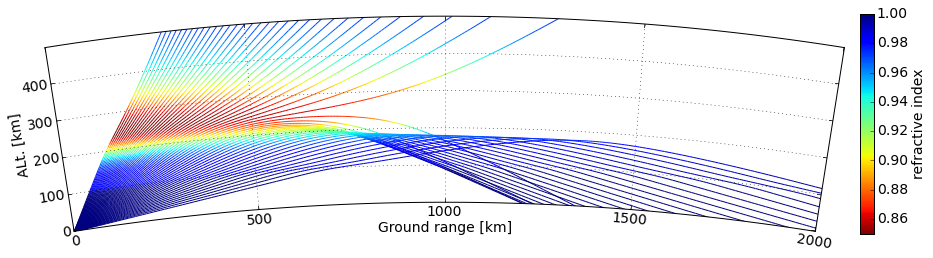

In [5]:
# Plot rays with refractive index color scale
# Plot 1 ray in 10 (1deg increment)
# Plot at start time
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.rays.plot(sTime, 
    step=10, showrefract=True, nr_lim=[.85,1])

ax.grid()

In [6]:
# Read electron densities into memory
rto.readEdens()

/usr/local/lib/python2.7/dist-packages/davitpy-0.2-py2.7-linux-x86_64.egg/davitpy/models/raydarn/rt.py:454: RuntimeWarning: invalid value encountered in log10
  im = aax.pcolormesh(X, Y, np.log10( self.edens[time][beam]['nel'] ),
/usr/local/lib/python2.7/dist-packages/matplotlib/colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


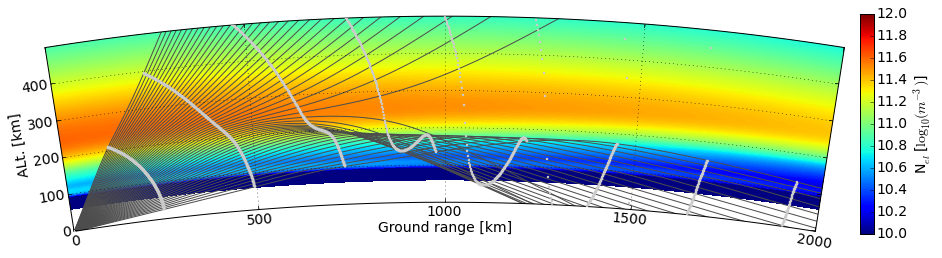

In [7]:
# Plot rays and electron densities together
# Plot at start time
# Plot range markers (every 250 km)
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.ionos.plot(sTime)
ax, aax, cbax = rto.rays.plot(sTime, 
    step=10, ax=ax, aax=aax)
rto.rays.showRange()

ax.grid()

In [8]:
# Read ionospheric and ground scatter into memory
rto.readScatter()

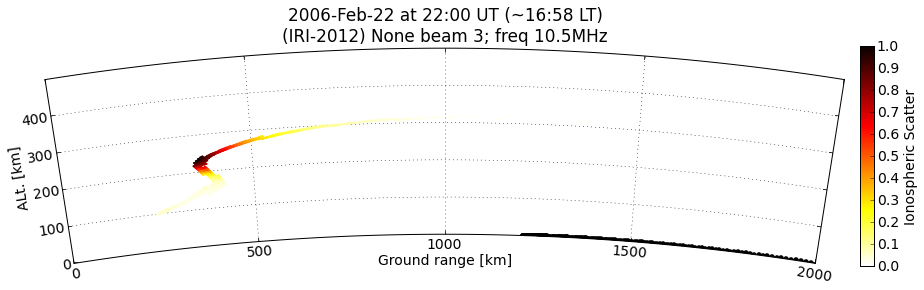

In [9]:
# Plot ionospheric and ground scatter together
# Plot at start time
# Plot relative strength of ionospheric scatter
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cax = rto.scatter.plot(sTime, 
    title=True, weighted=True)

ax.grid()